<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#010989;
           font-size:200%;
           font-family:Sans-Serif;
           letter-spacing:0.5px">

<h1 style="padding: 20px;
          color:#bdbdbd;
          font-size:150%;
          text-align:center;">
<b>FINANCIAL INCLUSION IN AFRICA</b>
</h1>

<h2 style=   "padding: 10px 10px 0px 10px;
                color: #bdbdbd;
                font-size: 120%;
                text-align: center">
        Zindi Starter Competition
    </h2>
    <p style="text-align:center;
            font-size:70%;
            padding: 0px 0px 5px 0px;
            color: #bdbdbd">
        Objective: Build a Model to Predict Financial Inclusion in Africa
    </p>
    <p style="text-align:center; padding-bottom:5px">
        <a href="https://zindi.africa/competitions/financial-inclusion-in-africa"
        style="font-size:20px;
            color:#bdbdbd">Go to Zindi Competition Page</a>
    <p>
</div>
<div style="color: #010989;
            display:fill;
            border-radius:5px;
            background-color:#bdbdbd;
            font-family:Georgia;
            letter-spacing:0.5px;
            padding:50px">
        <h3 style="font-size:40px;
            font-family:Sans-Serif;
            text-align:left">
            <b>Contents</b>
        </h3>
        <p style="size:20px; padding">Click to Jump to Section</p>
        <ul style="font-size: 25px">
            <li ><a href="#data" style="color:#010989">Data Description</a></li>
            <li ><a href="#eda" style="color:#010989">Exploratory Data Analysis</a></li>
            <li ><a href="#visuals" style="color:#010989">Visualizations</a></li>
            <li ><a href="#feat-eng" style="color:#010989">Feature Engineering</a></li>
            <li ><a href="#model" style="color:#010989">Model Building</a>
                <ul style="font-size: 20px">
                    <li><a href="#compare">Compare Models</a></li>
                    <li><a href="#tuning">Hyparameter Tuning</a></li>
                    <li><a href="stacking">Stacking Model</a></li>
                </ul>
            </li>
            <li ><a href="#improve" style="color:#010989">Improve Model</a>
                <ul style="font-size: 20px">
                    <li><a href="#further-exp-eng">Further Exploration and Feature Engineering</a></li>
                    <li><a href="#retrain">Retrain Model</a></li>
                </ul>
            </li>
            <li ><a href="#predict-submit" style="color:#010989">Predictions and Submission</a></li>
            <li ><a href="#try" style="color:#010989">Try It Out</a></li>
        </ul>
</div>

In [1]:
import zipfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as imb_pipe
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier

import pickle

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1)
sns.set_palette("nipy_spectral", 8, .5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

import os

/home/me/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
with zipfile.ZipFile("data/financial-inclusion-in-africa.zip", "r") as myzip:
    if not os.path.exists('data'):
        os.makedirs('data')
    myzip.extractall(path='data')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#010989;
           font-size:200%;
           font-family:Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#bdbdbd;
          font-size:120%;
          text-align:center;">
Loading Datasets
</p>
</div>

In [2]:
df = pd.read_csv('data/Train.csv')

<a id="data"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#010989;
           font-size:200%;
           font-family:Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#bdbdbd;
          font-size:120%;
          text-align:center;">
Data Description/Variable Definitions
</p>
</div>

<div style="font-family:Georgia; color:#010989; background-color:#bdbdbd; padding:30px; font-size:17px;">

> * **country** - Country the interviewee is in.<br>
> * **year** - Year survey was done in.<br>
> * **uniqueid** - Unique identifier for each interviewee.<br>
> * **location_type** - "Type of location: Rural, Urban"<br>
> * **cellphone_access** - "If interviewee has access to a cellphone: Yes, No"<br>
> * **household_size** - Number of people living in one house<br>
> * **age_of_respondent** - The age of the interviewee<br>
> * **gender_of_respondent** - "Gender of interviewee: Male, Female"<br>
> * **relationship_with_head** - "The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know"<br>
> * **marital_status** - "The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know"<br>
> * **education_level** - "Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA"<br>
> * **job_type** - "Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer"<br>
</div>

---

<a id="eda"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#010989;
           font-size:200%;
           font-family:Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#bdbdbd;
          font-size:120%;
          text-align:center;">
Exploratory Data Analysis
</p>
</div>

### 1. Summary

In [4]:
print("Summary info on training dataset\n")
df.info()

Summary info on training dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


### 2. View Data Table

In [5]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


### 3. Check for Duplicates

In [6]:
print(f"Duplicates in Dataset: {df.duplicated().sum()} ({df.duplicated().sum()/len(df)}%)")

Duplicates in Dataset: 0 (0.0%)


### 4. Check Cardinality of Categorical Variables

In [7]:
print("Cardinality information for categorical variables in dataset:\n", end='-' * 100)
print(df.select_dtypes("object").nunique())

Cardinality information for categorical variables in dataset:
----------------------------------------------------------------------------------------------------country                      4
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64


In [8]:
df.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

<div style="font-family:Georgia; color:#010989; background-color:#bdbdbd; padding:30px; font-size:17px;">
<b style="font-size: 20px">Insights</b>

> Dataset contains 23,524 observations and 13 variables (23524, 12)<br>
> There are no missing values in the dataset<br>
> Some datatypes are not best for the columns. Conversions will be done thus:<br>
> <ul>
>    <li> year - datetime</li>
>    <li> cellphone_access - bool</li>
> </ul>
> No duplicates in the data<br>
> uniqueid has high cardinality, and will be dropped.<br>
> age_of_respondent also has high cardinality and will be spread into categories<br>
> No other tidiness or quality issues are observed so far

<b>TO DO</b>

> Change datatype of year to datetime<br>
> Change cellphone_access and bank_account<br>
> Convert bank_account to 0 and 1<br>

</div>

___

<a id="visuals"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#010989;
           font-size:200%;
           font-family:Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#bdbdbd;
          font-size:120%;
          text-align:center;">
Visualizations
</p>
</div>

In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [10]:
df[df.uniqueid=="uniqueid_1411"]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
1410,Kenya,2018,uniqueid_1411,Yes,Urban,Yes,5,26,Female,Spouse,Married/Living together,Secondary education,Remittance Dependent
7478,Rwanda,2016,uniqueid_1411,No,Urban,Yes,1,30,Male,Head of Household,Single/Never Married,Primary education,Informally employed
16213,Tanzania,2017,uniqueid_1411,No,Urban,Yes,3,38,Male,Head of Household,Single/Never Married,Primary education,Self employed
22833,Uganda,2018,uniqueid_1411,No,Urban,Yes,2,20,Female,Spouse,Married/Living together,Primary education,No Income


### 1. Visualziing the Target Feature: bank_account

In [11]:
df.bank_account.value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [14]:
ser = df.bank_account.value_counts()
keys = ser.keys()[::-1]
values = ser.values[::-1]
keys, values

(Index(['Yes', 'No'], dtype='object'), array([ 3312, 20212]))

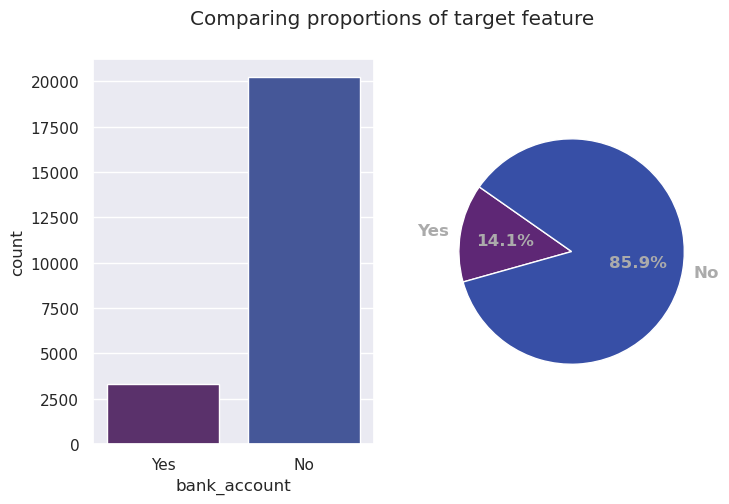

In [15]:
ser = df.bank_account.value_counts().sort_values()
keys = ser.keys()
values = ser.values

fig = plt.figure(figsize=(8,5))
fig.add_subplot(1,2,1)
ax1 = sns.countplot(data=df, x='bank_account');
fig.add_subplot(1,2,2)
ax2 = plt.pie(values, labels=keys, startangle=145,
        autopct="%1.1f%%", textprops={"fontsize":12, "fontweight":"black", "color":"#ababab"})
plt.suptitle("Comparing proportions of target feature");

<div style="font-family:Georgia; color:#010989; background-color:#bdbdbd; padding:30px; font-size:17px;">
<b style="font-size: 20px">Insights</b>

> * There is an obvious class imbalance in this dataset, also showing the poor financial inclusion in the dataset<br>
> * There will be a need for OverSampling to build the model<br>
</div>

### 2. Explore Age
with respect to the target variable

(10.0, 103.95)

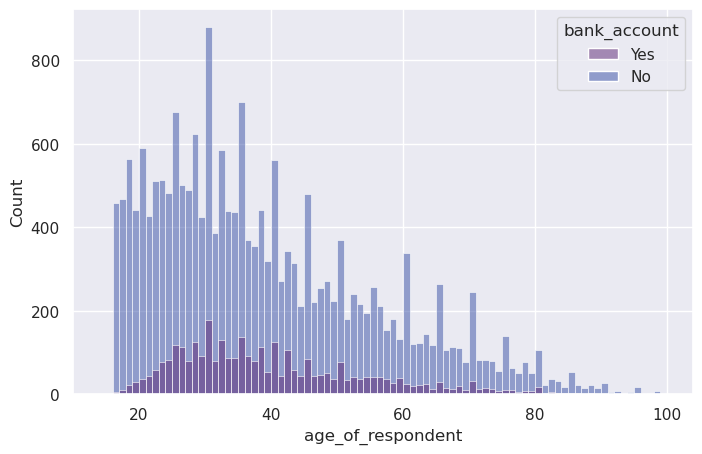

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age_of_respondent', hue='bank_account', bins=np.arange(0, 100, 1))
plt.xlim(10,)

(10.0, 105.0)

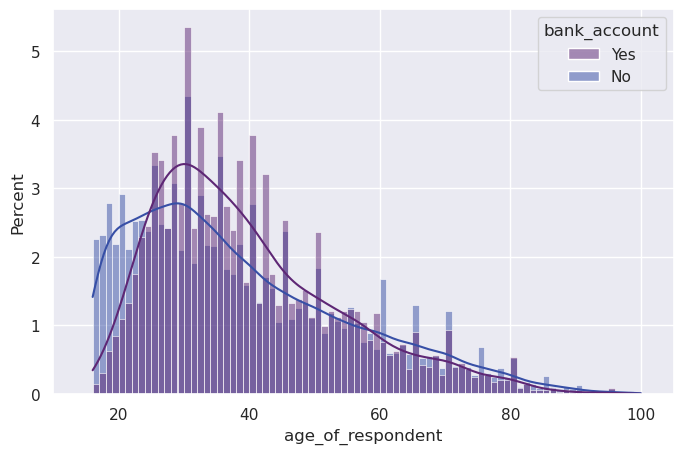

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age_of_respondent', hue='bank_account', kde=True, stat='percent', common_norm=False,
            bins=np.arange(0, 100, 1))
plt.xlim(10,)

In [18]:
print(f"Max Age: {df.age_of_respondent.max()}")
print(f"Min Age: {df.age_of_respondent.min()}")

Max Age: 100
Min Age: 16


In [19]:
df.age_of_respondent.value_counts().sort_index()[30:]

46     264
47     300
48     322
49     260
50     448
51     214
52     279
53     253
54     234
55     297
56     250
57     189
58     206
59     171
60     364
61     139
62     143
63     168
64     129
65     293
66     120
67     125
68     130
69      87
70     275
71      95
72      97
73      92
74      64
75     149
76      72
77      56
78      83
79      58
80     124
81      24
82      41
83      33
84      20
85      55
86      25
87      16
88      24
89      16
90      28
91       5
92       7
93       4
94       5
95      19
96       3
97       1
98       6
99       2
100      5
Name: age_of_respondent, dtype: int64

<AxesSubplot:xlabel='age_of_respondent'>

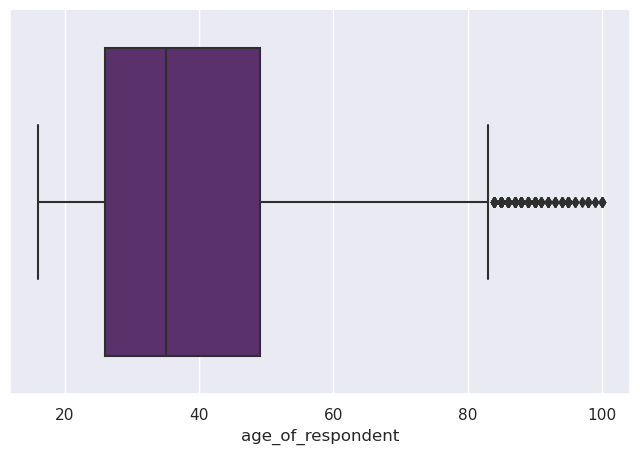

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x=df.age_of_respondent)

<div style="font-family:Georgia; color:#010989; background-color:#bdbdbd; padding:30px; font-size:17px;">
<b style="font-size: 20px">Insights</b>

> * The youngest respondent is about 15 and the eldest about 100<br>
> * There is a similar trend between the those with and without bank accounts, except at the younger ages, especially below 20.
> * The greater population falls in the 25-50 years range, and the higher fraction of those with or without bank accounts is higher in this range, as expected. But looking closer, considering those with accounts, ages below 20 are less likely to have an account, and persons in that 25-50 range are more likely to have accounts. Above that, the likelihood seems the same. **NOTE:** This is comparing the proportions of those in an age range who have an account to the general population of those with accounts, against the proportion of those without accounts to the general population without accounts.
> * There seems to be a spike every 5 years, i.e., 35, 40, 45, 50, etc. This might be due to age approximations.
> * There are no outliers in the data

<b style="font-size: 18px">TODO</b>

* Create categories from this data, thus:
  - 1: 15 - 24<br>
  - 2: 25 - 34<br>
  - 3: 35 - 44<br>
  - 4: 45 - 54<br>
  - 5: 55 - 64<br>
  - 6: 65 - 74<br>
  - 7: 75 - 84<br>
  - 8: 85 - 94<br>
  - 9: 95 - 105<br>
</div>

### 3. Explore Country

In [21]:
df.country.value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

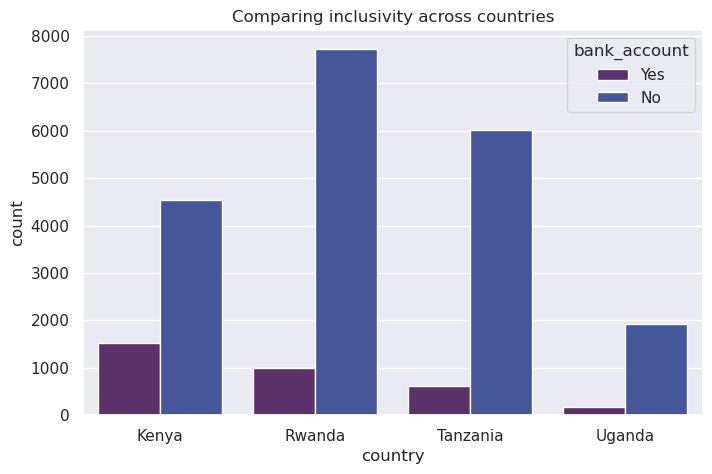

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='country', hue='bank_account')
plt.title("Comparing inclusivity across countries");

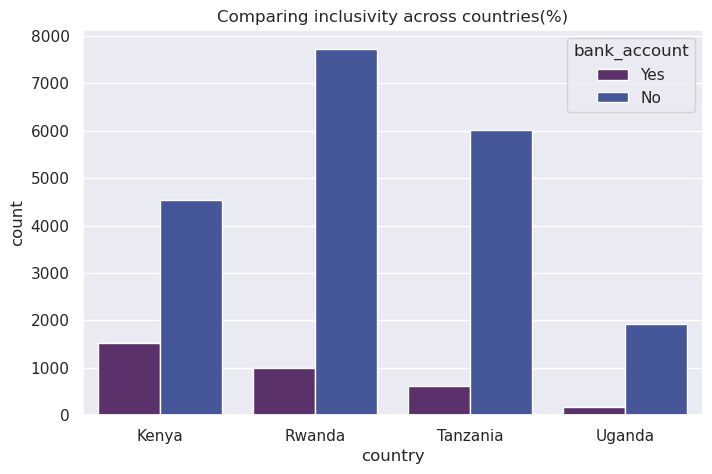

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='country', hue='bank_account', )
plt.title("Comparing inclusivity across countries(%)");

<div style="font-family:Georgia; color:#010989; background-color:#bdbdbd; padding:30px; font-size:17px;">
<b style="font-size: 20px">Insights</b>

> * Rwanda is most, while Uganda is least represented. Tanzania has a slightly higher representation than Kenya<br>
> * Kenyans appear to have the most people with Bank Accounts, Rwanda has the most without

</div>

### 4. Explore other categorical variables

In [24]:
cat_cols = df.select_dtypes(include=('object')).columns
cat_cols

Index(['country', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')

In [25]:
cat_cols = cat_cols.delete(1)
cat_cols

Index(['country', 'bank_account', 'location_type', 'cellphone_access',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

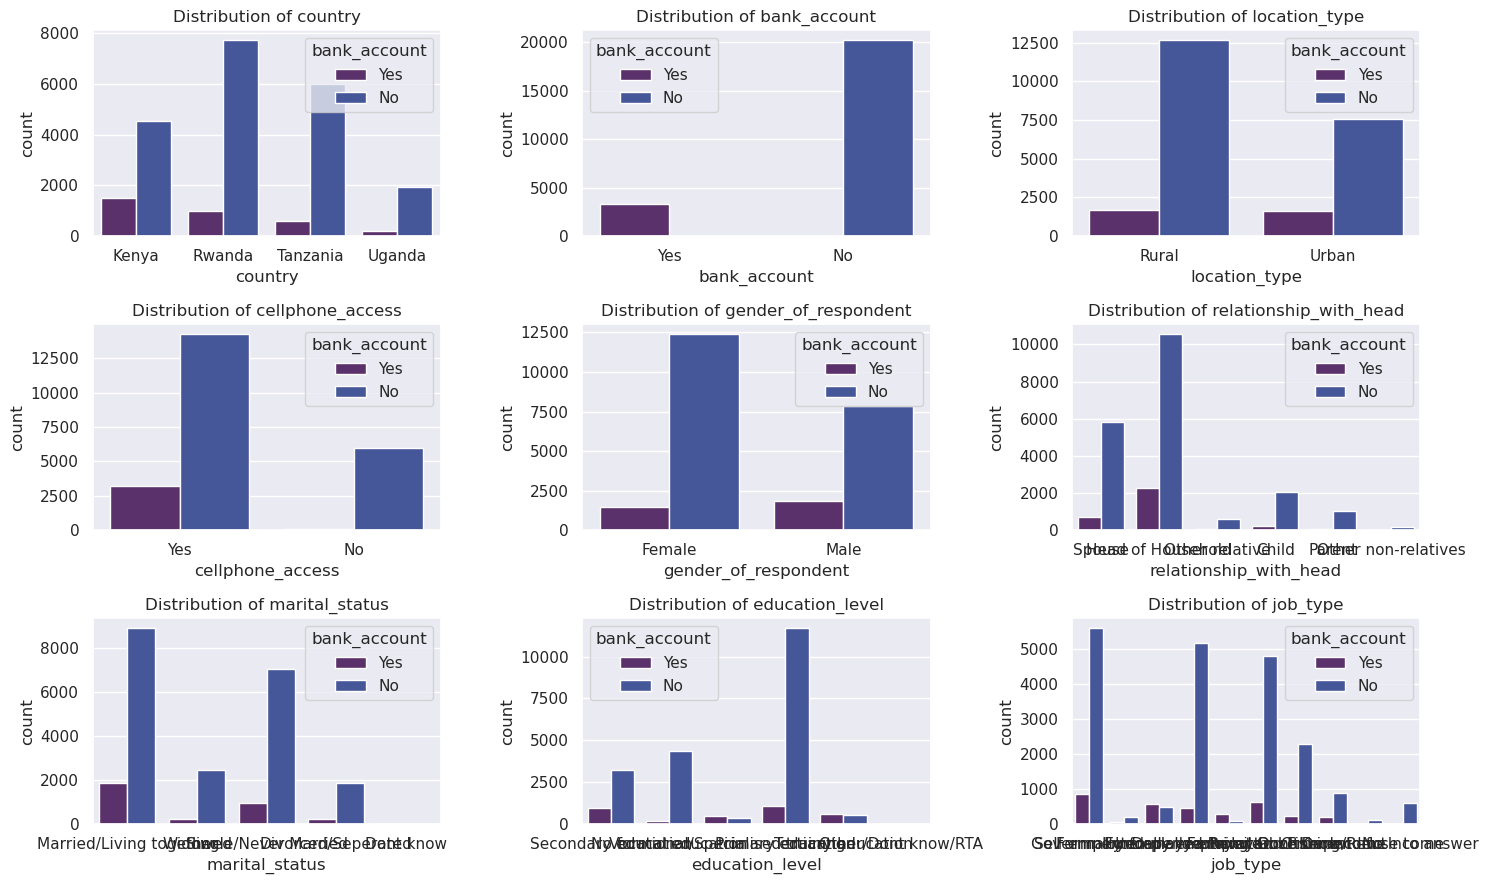

In [26]:
fig = plt.figure(figsize=(15,9))

for index, column in enumerate(cat_cols):
    plt.subplot(3,3,index+1)
    sns.countplot(data=df, x=column, hue='bank_account', orient='h')
    plt.xticks()
    plt.title(f"Distribution of {column}")
    fig.tight_layout()

In [27]:
len(df.cellphone_access[(df.bank_account=='Yes') & (df.cellphone_access=='No')])

104

<div style="font-family:Georgia; color:#010989; background-color:#bdbdbd; padding:30px; font-size:17px;">
<b style="font-size: 20px">Insights</b>

> * These features all give useful insights into the data, giving comparative proportions of groups that are more likely to have bank accounts or not

</div>

### 5. Check possible correlations

<AxesSubplot:>

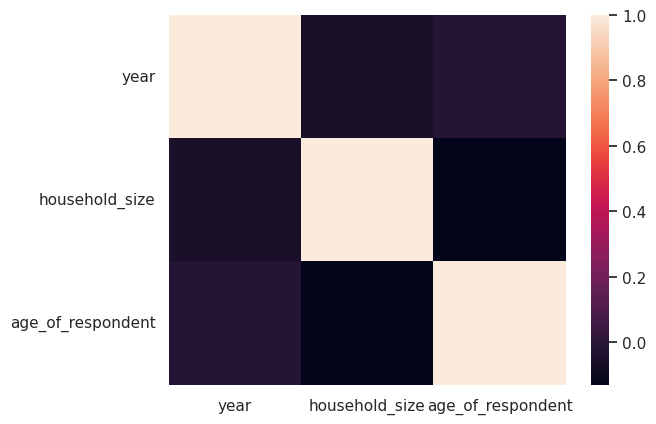

In [28]:
sns.heatmap(df.corr())

<div style="font-family:Georgia; color:#010989; background-color:#bdbdbd; padding:30px; font-size:17px;">
<b style="font-size: 20px">Insights</b>

> No correlation between numerical variables

</div>

### 6. Explore uniqueid colulmn

This column has high cardinality, and it will be accessed for patterns.<br>
Manual inspection of the data in the dataframe

In [6]:
type(df.uniqueid.value_counts())

pandas.core.series.Series

In [3]:
uid_counts = df.uniqueid.value_counts()

In [4]:
# uid_counts

Text(0.5, 1.0, 'First 20 uniqueids')

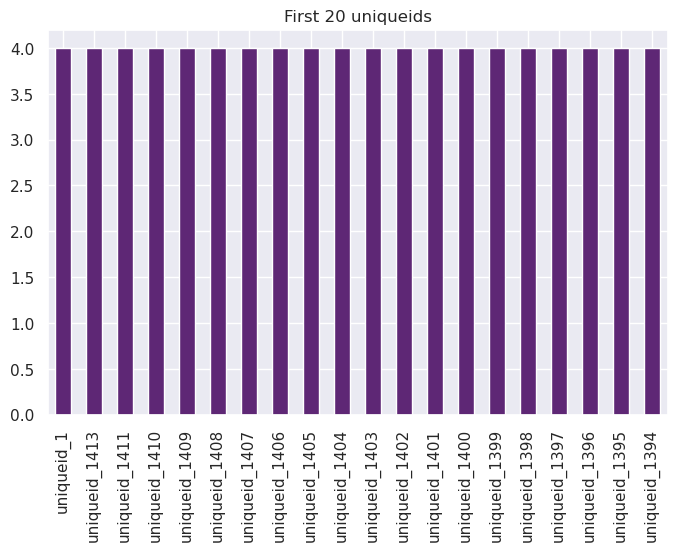

In [32]:
plt.figure(figsize=(8,5))
uid_counts.head(20).plot(kind='bar')
plt.title('First 20 uniqueids')

Text(0.5, 1.0, 'Last 20 uniqueids')

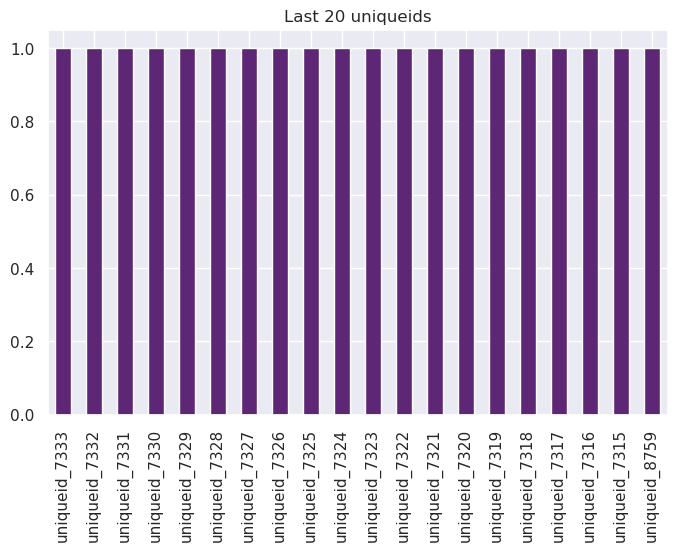

In [33]:
plt.figure(figsize=(8,5))
uid_counts.tail(20).plot(kind='bar')
plt.title("Last 20 uniqueids")

<div style="font-family:Georgia; color:#010989; background-color:#bdbdbd; padding:30px; font-size:17px;">
<b style="font-size: 20px">Insights</b>

> * The most frequently occuring ids occur four times. This corresponds to the number of countries reprsented in the dataset. So, there are four uniqueid_1's, corresponding to the first respondent in each country.
> * The least reoccuring uniqueid's occur only once. This is because some countries have more respondent than others, and so, uniqueid_8759, for instance, is only present in Rwanda, which has the highest number of respondents.
> * This feature will not be useful in the model. Extracting the integer parts would only be recreating the countries column.

</div>

---

<a id="feat-eng"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#010989;
           font-size:200%;
           font-family:Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#bdbdbd;
          font-size:120%;
          text-align:center;">
Feature Engineering<br>
</p>
</div>

In [34]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


### Keep track of wrangling efforts

In [3]:
# define a wrangle function for easier processing

def wrangle(filepath, test=False):
    """ Wrangle function to process train and test set
    
    Args:
        filepath (str): path to the file containing data
        test (bool): False, track test file for necessary differences
                            in processing
    Return:
        df (pd.DataFrame): result of the wrangling process
    """
    df = pd.read_csv(filepath)
    
    # conert year to a datetime type
    df.year = pd.to_datetime(df.year.astype('int32'), format='%Y')

    # convert cellphone_access column to boolean
    df.cellphone_access = df.cellphone_access.astype('bool')

    if test == False:
        # convert target column, bank_account, to 0's and 1's
        df.bank_account = df.bank_account.map({'Yes':1, 'No':0})

    # create age group column
    age_group = []
    for age in df.age_of_respondent:
        if age>=15 and age<25:
            age_group.append(1)
        if age>=25 and age<35:
            age_group.append(2)
        if age>=35 and age<45:
            age_group.append(3)
        if age>=45 and age<55:
            age_group.append(4)
        if age>=55 and age<65:
            age_group.append(5)
        if age>=65 and age<75:
            age_group.append(6)
        if age>=75 and age<85:
            age_group.append(7)
        if age>=85 and age<95:
            age_group.append(8)
        if age>=95 and age<=105:
            age_group.append(9)

    df['age_group'] = age_group

    # set uniqueid column as index
    df.set_index(df.uniqueid, inplace=True)

    # set index
    df.set_index(df.uniqueid, inplace=True)

    # drop columns
    df.drop(columns=['uniqueid', 'age_of_respondent'], inplace=True)


    return df

test_wrangle = wrangle('data/Train.csv')
test_wrangle.head()

,country,year,bank_account,location_type,cellphone_access,household_size,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_group
uniqueid,,,,,,,,,,,,
uniqueid_1,Kenya,2018-01-01,1,Rural,True,3,Female,Spouse,Married/Living together,Secondary education,Self employed,1
uniqueid_2,Kenya,2018-01-01,0,Rural,True,5,Female,Head of Household,Widowed,No formal education,Government Dependent,6
uniqueid_3,Kenya,2018-01-01,1,Urban,True,5,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,2
uniqueid_4,Kenya,2018-01-01,0,Rural,True,5,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,2
uniqueid_5,Kenya,2018-01-01,0,Urban,True,8,Male,Child,Single/Never Married,Primary education,Informally employed,2


The TO DO's will be implemented here, and other necessary feature engineering

### 1. Correct data types

##### Define
Change year column to datetime
##### Code

In [36]:
# Change year to datetime
df.year = pd.to_datetime(df.year.astype('int32'), format='%Y')

# .astype('int32') was necessary because the original daatype was 
# int64' and that will result in parsing errors with pd.to_datetime

##### Test

In [37]:
df.year.head()

0   2018-01-01
1   2018-01-01
2   2018-01-01
3   2018-01-01
4   2018-01-01
Name: year, dtype: datetime64[ns]

##### Define
Convert cellphone_access to bool
##### Code

In [38]:
df.cellphone_access = df.cellphone_access.astype('bool')

##### Test

In [39]:
df.cellphone_access.dtype

dtype('bool')

##### Define
Convert the target column, bank_account to 0's and 1's
##### Code

In [40]:
df.bank_account = df.bank_account.map({'Yes':1, 'No':0})

##### Test

In [41]:
df.bank_account.head()

0    1
1    0
2    1
3    0
4    0
Name: bank_account, dtype: int64

##### Define
Create categories for age

##### Code

In [42]:
age_group = []
for age in df.age_of_respondent:
    if age>=15 and age<25:
        age_group.append(1)
    if age>=25 and age<35:
        age_group.append(2)
    if age>=35 and age<45:
        age_group.append(3)
    if age>=45 and age<55:
        age_group.append(4)
    if age>=55 and age<65:
        age_group.append(5)
    if age>=65 and age<75:
        age_group.append(6)
    if age>=75 and age<85:
        age_group.append(7)
    if age>=85 and age<95:
        age_group.append(8)
    if age>=95 and age<=105:
        age_group.append(9)

df['age_group'] = age_group

##### Test

In [43]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_group
0,Kenya,2018-01-01,uniqueid_1,1,Rural,True,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,1
1,Kenya,2018-01-01,uniqueid_2,0,Rural,True,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,6
2,Kenya,2018-01-01,uniqueid_3,1,Urban,True,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,2
3,Kenya,2018-01-01,uniqueid_4,0,Rural,True,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,2
4,Kenya,2018-01-01,uniqueid_5,0,Urban,True,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,2


##### Set uniqueid as the index

Instead of dropping the uniquid index, it will be set as the index so it is preserved for coding the submissions later

In [44]:
df.set_index(df.uniqueid, inplace=True)
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_group
uniqueid,,,,,,,,,,,,,,
uniqueid_1,Kenya,2018-01-01,uniqueid_1,1,Rural,True,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,1
uniqueid_2,Kenya,2018-01-01,uniqueid_2,0,Rural,True,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,6
uniqueid_3,Kenya,2018-01-01,uniqueid_3,1,Urban,True,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,2
uniqueid_4,Kenya,2018-01-01,uniqueid_4,0,Rural,True,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,2
uniqueid_5,Kenya,2018-01-01,uniqueid_5,0,Urban,True,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,2


##### Visualize

Text(0.5, 1.0, 'Age Group Distribution')

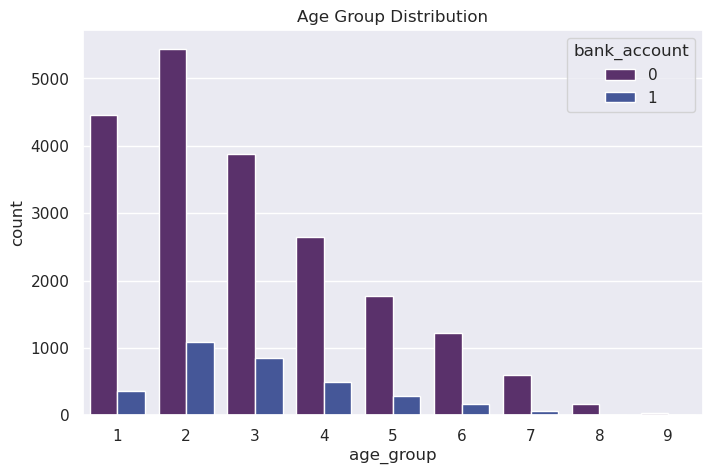

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='age_group', hue='bank_account')
plt.title('Age Group Distribution')

##### Define
Drop the unnecessary columns
* age_of_respondent
* uniqueid

##### Code

In [46]:
df.drop(columns=['age_of_respondent', 'uniqueid'], inplace=True)

##### Test

In [47]:
df.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type', 'age_group'],
      dtype='object')

---

<a id="model"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#010989;
           font-size:200%;
           font-family:Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#bdbdbd;
          font-size:120%;
          text-align:center;">
Model Building<br>
</p>
</div>

## Load and Split Data

In [4]:
model_df = wrangle('data/Train.csv')
model_df.head()

,country,year,bank_account,location_type,cellphone_access,household_size,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_group
uniqueid,,,,,,,,,,,,
uniqueid_1,Kenya,2018-01-01,1,Rural,True,3,Female,Spouse,Married/Living together,Secondary education,Self employed,1
uniqueid_2,Kenya,2018-01-01,0,Rural,True,5,Female,Head of Household,Widowed,No formal education,Government Dependent,6
uniqueid_3,Kenya,2018-01-01,1,Urban,True,5,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,2
uniqueid_4,Kenya,2018-01-01,0,Rural,True,5,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,2
uniqueid_5,Kenya,2018-01-01,0,Urban,True,8,Male,Child,Single/Never Married,Primary education,Informally employed,2


In [5]:
y = model_df['bank_account']
X = model_df.drop(columns=['bank_account'])

In [6]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (21171, 11)
Shape of X_test: (2353, 11)
Shape of y_train: (21171,)
Shape of y_test: (2353,)


In [51]:
model_names = []
training_scores = []
testing_scores = []


def model_build_score(model):
    """ Function to build and score models
    
    Args:
        model (scikit learn model)
        
    Return:
        No return
    """

    model_name = str(model)[:-2].title()

    # make pipeline with
    model_pipe = imb_pipe(
        RandomOverSampler(random_state=42),
        OneHotEncoder(handle_unknown='ignore'),
        model
    )
    model_pipe.fit(X_train, y_train)

    # make predictions
    train_pred = model_pipe.predict(X_train)
    test_pred = model_pipe.predict(X_test)

    # score
    train_score = 1 - accuracy_score(y_train, train_pred)
    test_score = 1 - accuracy_score(y_test, test_pred)

    # append values to list
    model_names.append(model)
    training_scores.append(train_score)
    testing_scores.append(test_score)

    # output
    print(f"Scores for {str(model).upper()}")
    print("Lower Score is Better")
    print(f"Accuracy on Training Data: {train_score}")
    print(f"Accuracy on Testing Data: {test_score}")
    print("\n--------------------------------------------------------------------------------------\n")
    print(f"Precision:'\t{np.round(precision_score(y_test, test_pred, average=None)*100, decimals=2)}")
    print(f"Recall:'\t{np.round(recall_score(y_test, test_pred, average=None)*100, decimals=1)}")
    print(f"f1_score:\t{np.round(f1_score(y_test, test_pred)*100, decimals=2)}")
    print(f"Confusion:'\n{confusion_matrix(y_test, test_pred)}")

    print("\n--------------------------------------------------------------------------------------\n")

    # create axes for two figures
    fig = plt.figure(figsize=(8,4))

    # create axes for first plot, the heatmap
    ax1 = fig.add_subplot(1,2,1)
    sns.heatmap(confusion_matrix(y_test, test_pred), cmap='Blues')
    ax1.set_xlabel("Actual")
    ax1.set_ylabel("Predicted")
    ax1.set_title("Confusion Matrix");

    # create subplot for second plot, the comparison plot
    ax2 = fig.add_subplot(1,2,2)
    sns.countplot(x=y_test, color='r');
    sns.countplot(x=test_pred, color='b', alpha=0.5);
    ax2.legend(['Actual', 'Predicted']);
    ax2.set_xticklabels(['False', 'True'])
    ax2.set_xlabel("Predictions")
    ax2.set_ylabel("Frequency")
    ax2.set_title("Comparison of Predictions")

    plt.suptitle(f"Metrics for {model_name}: {test_score}")

    fig.tight_layout()

<a id="1.3"></a>
<h2 style="font-family: sans-serif; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #010989; background-color: #bdbdbd; padding:5px"><b>1. Logistic Regression </b> Model</h2>

Scores for LOGISTICREGRESSION()
Lower Score is Better
Accuracy on Training Data: 0.19607009588588165
Accuracy on Testing Data: 0.19422014449638758

--------------------------------------------------------------------------------------

Precision:'	[94.15 38.5 ]
Recall:'	[82.6 68. ]
f1_score:	49.17
Confusion:'
[[1675  353]
 [ 104  221]]

--------------------------------------------------------------------------------------



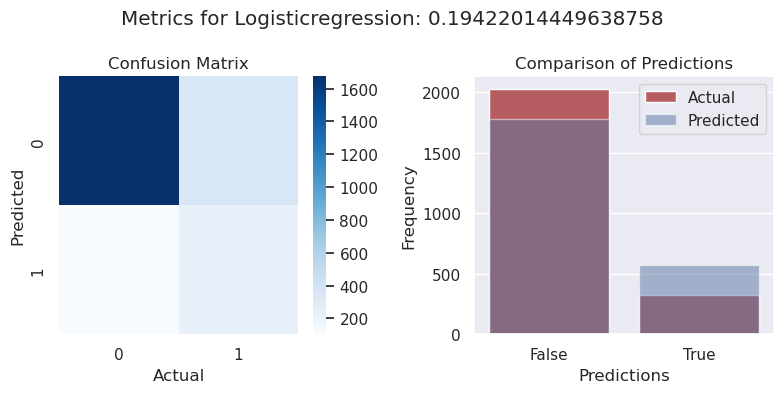

In [52]:
model_build_score(LogisticRegression())

<a id="1.3"></a>
<h2 style="font-family: sans-serif; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #010989; background-color: #bdbdbd; padding:5px"><b>2. Support Vector Machine Classifier </b> Model</h2>

Scores for SVC()
Lower Score is Better
Accuracy on Training Data: 0.1709886165037079
Accuracy on Testing Data: 0.19294517637059072

--------------------------------------------------------------------------------------

Precision:'	[94.56 39.01]
Recall:'	[82.3 70.5]
f1_score:	50.22
Confusion:'
[[1670  358]
 [  96  229]]

--------------------------------------------------------------------------------------



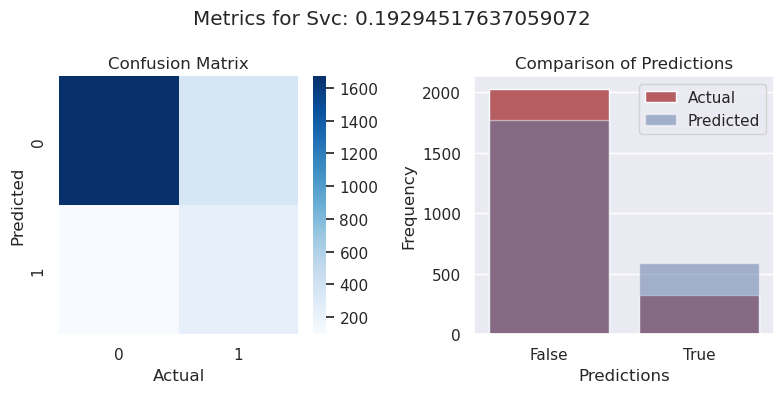

In [53]:
model_build_score(SVC())

<a id="1.3"></a>
<h2 style="font-family: sans-serif; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #010989; background-color: #bdbdbd; padding:5px"><b>3. DecisionTree Classifier </b> Model</h2>

Scores for DECISIONTREECLASSIFIER()
Lower Score is Better
Accuracy on Training Data: 0.0929101128902744
Accuracy on Testing Data: 0.2065448363790905

--------------------------------------------------------------------------------------

Precision:'	[91.54 33.8 ]
Recall:'	[83.8 51.7]
f1_score:	40.88
Confusion:'
[[1699  329]
 [ 157  168]]

--------------------------------------------------------------------------------------



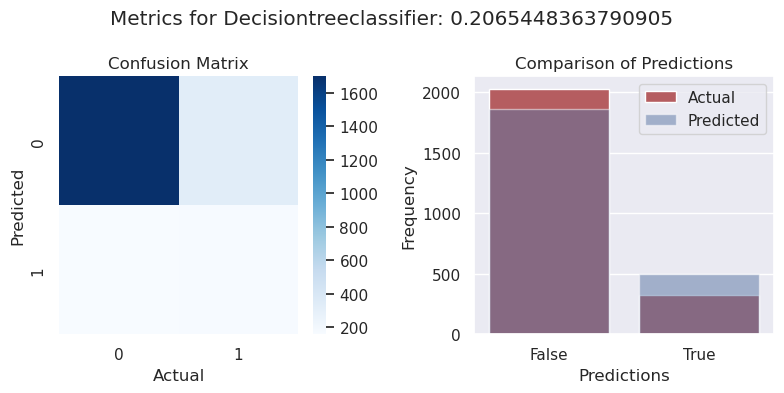

In [54]:
model_build_score(DecisionTreeClassifier())

<a id="1.3"></a>
<h2 style="font-family: sans-serif; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #010989; background-color: #bdbdbd; padding:5px"><b>4. XGBoost Classifier </b> Model</h2>

[18:59:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Scores for XGBCLASSIFIER(BASE_SCORE=0.5, BOOSTER='GBTREE', COLSAMPLE_BYLEVEL=1,
              COLSAMPLE_BYNODE=1, COLSAMPLE_BYTREE=1, ENABLE_CATEGORICAL=FALSE,
              GAMMA=0, GPU_ID=-1, IMPORTANCE_TYPE=NONE,
              INTERACTION_CONSTRAINTS='', LEARNING_RATE=0.300000012,
              MAX_DELTA_STEP=0, MAX_DEPTH=6, MIN_CHILD_WEIGHT=1, MISSING=NAN,
              MONOTONE_CONSTRAINTS='()', N_ESTIMATORS=100, N_JOBS=4,
              NUM_PARALLEL_TREE=1, PREDICTOR='AUTO', RANDOM_STATE=0,
              REG_ALPHA=0, REG_LAMBDA=1, SCALE_POS_WEIGHT=1, SUBSAMPLE=1,
              TREE_METHOD='EXACT', VALIDATE_PARAMETERS=1, VERBOSITY=NONE)
Lower Score is Better
Accuracy on Training Data: 0.15535402201124182
Accuracy on Testing Data: 0.19

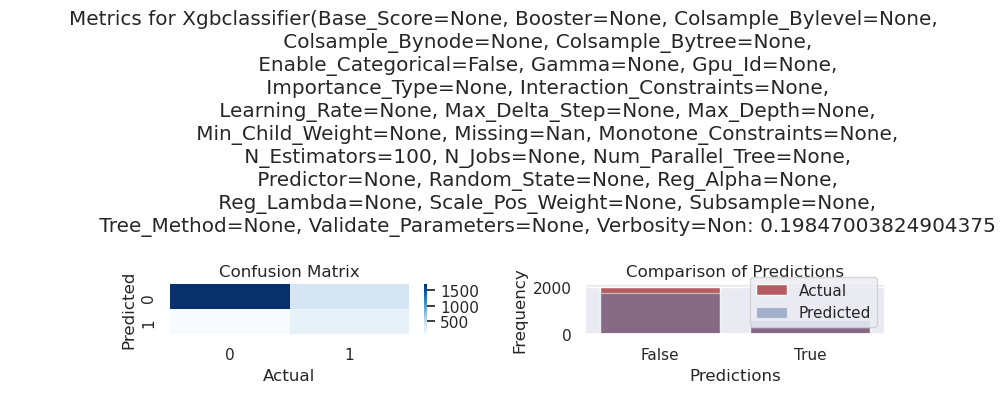

In [55]:
model_build_score(XGBClassifier())

<a id="1.3"></a>
<h2 style="font-family: sans-serif; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #010989; background-color: #bdbdbd; padding:5px"><b>5. CatBoost Classifier </b> Model</h2>

Scores for <CATBOOST.CORE.CATBOOSTCLASSIFIER OBJECT AT 0X7FF8075331F0>
Lower Score is Better
Accuracy on Training Data: 0.15115015823532185
Accuracy on Testing Data: 0.19124521886952828

--------------------------------------------------------------------------------------

Precision:'	[94.38 39.13]
Recall:'	[82.7 69.2]
f1_score:	50.0
Confusion:'
[[1678  350]
 [ 100  225]]

--------------------------------------------------------------------------------------



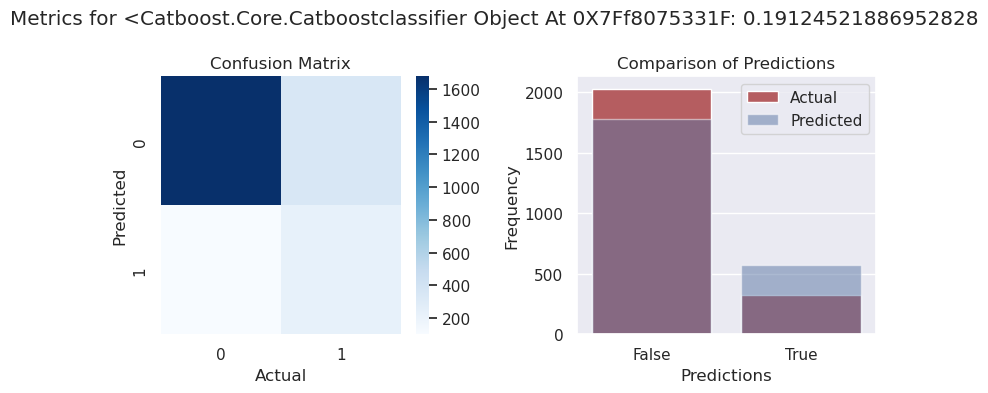

In [56]:
model_build_score(CatBoostClassifier(verbose=False))

<a id="1.3"></a>
<h2 style="font-family: sans-serif; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #010989; background-color: #bdbdbd; padding:5px"><b>6. RandomForest Classifier </b> Model</h2>

Scores for RANDOMFORESTCLASSIFIER()
Lower Score is Better
Accuracy on Training Data: 0.09560247508384112
Accuracy on Testing Data: 0.19294517637059072

--------------------------------------------------------------------------------------

Precision:'	[91.77 36.25]
Recall:'	[85.3 52.3]
f1_score:	42.82
Confusion:'
[[1729  299]
 [ 155  170]]

--------------------------------------------------------------------------------------



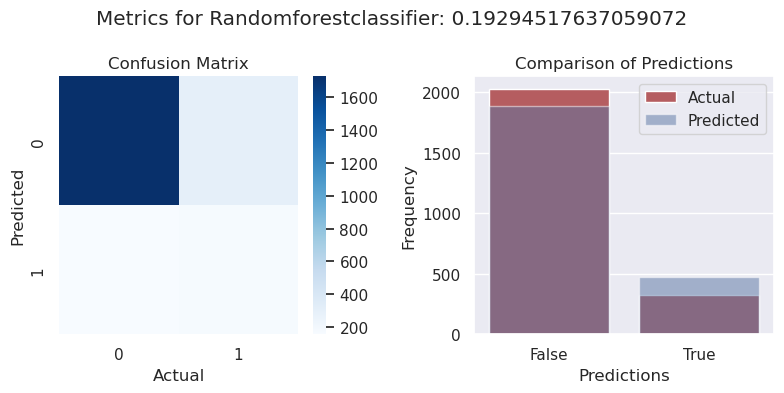

In [57]:
model_build_score(RandomForestClassifier())

<a id="1.3"></a>
<h2 style="font-family: sans-serif; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #010989; background-color: #bdbdbd; padding:5px"><b>7. GradientBoosting Classifier </b> Model</h2>

Scores for GRADIENTBOOSTINGCLASSIFIER()
Lower Score is Better
Accuracy on Training Data: 0.18917386991639507
Accuracy on Testing Data: 0.19124521886952828

--------------------------------------------------------------------------------------

Precision:'	[94.68 39.35]
Recall:'	[82.4 71.1]
f1_score:	50.66
Confusion:'
[[1672  356]
 [  94  231]]

--------------------------------------------------------------------------------------



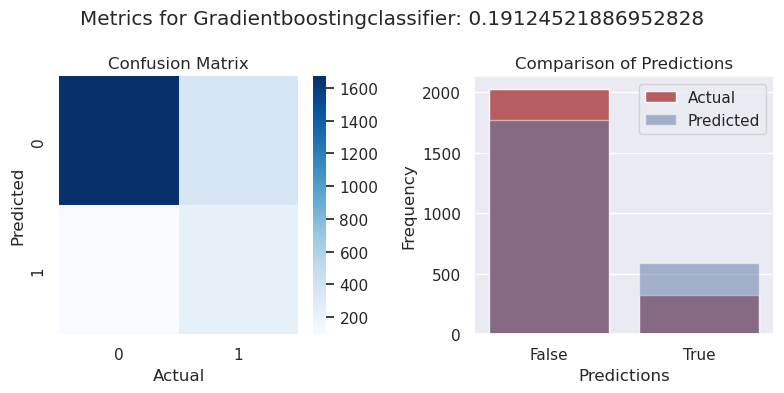

In [58]:
model_build_score(GradientBoostingClassifier())

<a id="1.3"></a>
<h2 style="font-family: sans-serif; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #010989; background-color: #bdbdbd; padding:5px"><b>8. AdaBoost Classifier </b> Model</h2>

Scores for ADABOOSTCLASSIFIER()
Lower Score is Better
Accuracy on Training Data: 0.19304709272117515
Accuracy on Testing Data: 0.193795155121122

--------------------------------------------------------------------------------------

Precision:'	[94.16 38.57]
Recall:'	[82.6 68. ]
f1_score:	49.22
Confusion:'
[[1676  352]
 [ 104  221]]

--------------------------------------------------------------------------------------



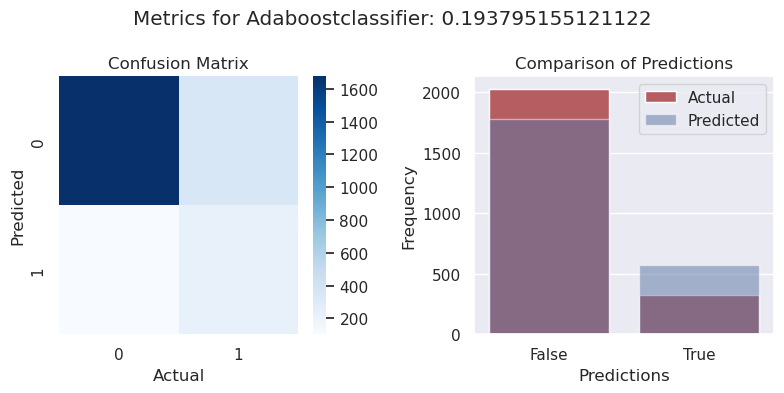

In [59]:
model_build_score(AdaBoostClassifier())

<a id="1.3"></a>
<h2 style="font-family: sans-serif; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #010989; background-color: #bdbdbd; padding:5px"><b>9. KNeighborsClassifier </b> Model</h2>

Scores for KNEIGHBORSCLASSIFIER()
Lower Score is Better
Accuracy on Training Data: 0.1671153936989278
Accuracy on Testing Data: 0.24266893327666805

--------------------------------------------------------------------------------------

Precision:'	[93.44 31.8 ]
Recall:'	[77.3 66.2]
f1_score:	42.96
Confusion:'
[[1567  461]
 [ 110  215]]

--------------------------------------------------------------------------------------



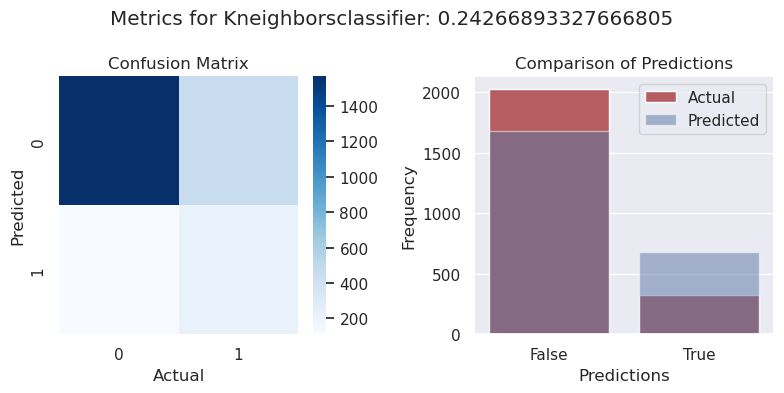

In [60]:
model_build_score(KNeighborsClassifier())

<a id="1.3"></a>
<h2 style="font-family: sans-serif; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #010989; background-color: #bdbdbd; padding:5px"><b>10. RidgeClassifier </b> Model</h2>

Scores for RIDGECLASSIFIER()
Lower Score is Better
Accuracy on Training Data: 0.18903216664304945
Accuracy on Testing Data: 0.18572035699107525

--------------------------------------------------------------------------------------

Precision:'	[94.02 39.74]
Recall:'	[83.8 66.8]
f1_score:	49.83
Confusion:'
[[1699  329]
 [ 108  217]]

--------------------------------------------------------------------------------------



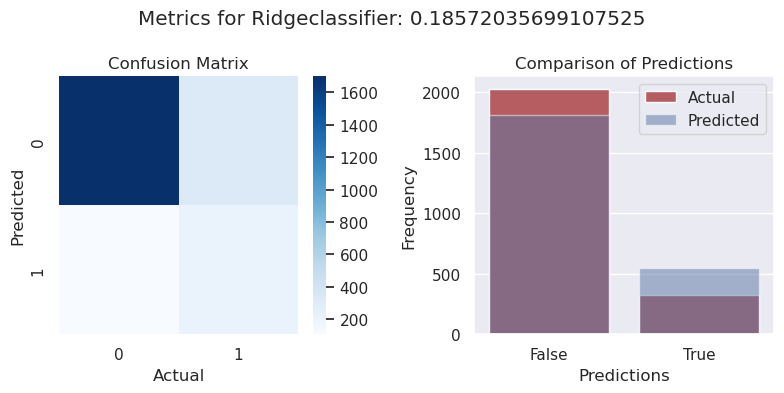

In [61]:
model_build_score(RidgeClassifier())

<a id="compare"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#010989;
           font-size:200%;
           font-family:Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#bdbdbd;
          font-size:120%;
          text-align:center;">
Compare Models<br>
</p>
</div>

### Create a DataFrame of scores

In [62]:
names = ['Logistic Regression', 'SVM', 'DecisionTree', 'XGB', 'CatBoost',
            'RandomForest', 'Gradient Boost', 'AdaBoost', 'KNN', 'RidgeClassifier']
score_df = pd.DataFrame(
    {
        "Models": names,
        "Train Scores": training_scores,
        "Test Scores": testing_scores
    }
)
score_df

,Models,Train Scores,Test Scores
0,Logistic Regression,0.196070,0.194220
1,SVM,0.170989,0.192945
2,DecisionTree,0.092910,0.206545
3,XGB,0.155354,0.198470
4,CatBoost,0.151150,0.191245
5,RandomForest,0.095602,0.192945
6,Gradient Boost,0.189174,0.191245
7,AdaBoost,0.193047,0.193795
8,KNN,0.167115,0.242669
9,RidgeClassifier,0.189032,0.185720


### Plot scores

Text(0, 0.5, 'Scores (lower is better')

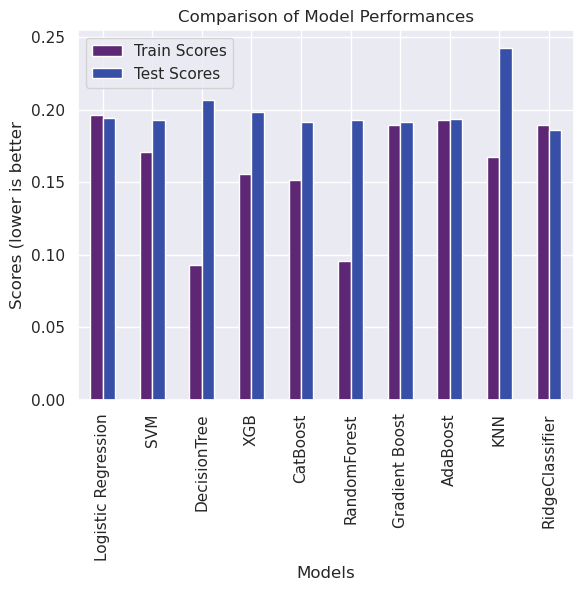

In [63]:
score_df.plot(x='Models', y=['Train Scores', 'Test Scores'], kind='bar',
            title='Comparison of Model Performances')
plt.ylabel('Scores (lower is better')

### Plot scores in order

In [64]:
score_df.sort_values(by='Test Scores')

,Models,Train Scores,Test Scores
9,RidgeClassifier,0.189032,0.185720
4,CatBoost,0.151150,0.191245
6,Gradient Boost,0.189174,0.191245
1,SVM,0.170989,0.192945
5,RandomForest,0.095602,0.192945
7,AdaBoost,0.193047,0.193795
0,Logistic Regression,0.196070,0.194220
3,XGB,0.155354,0.198470
2,DecisionTree,0.092910,0.206545
8,KNN,0.167115,0.242669


Text(0, 0.5, 'Scores (lower is better')

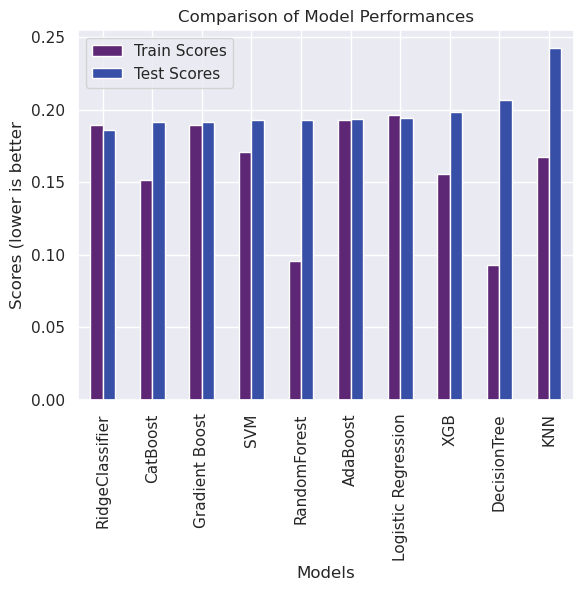

In [65]:
score_df.sort_values(by='Test Scores').plot(x='Models', y=['Train Scores', 'Test Scores'], kind='bar',
            title='Comparison of Model Performances')
plt.ylabel('Scores (lower is better')

<div style="font-family:Georgia; color:#010989; background-color:#bdbdbd; padding:30px; font-size:17px;">
<b style="font-size: 20px">Insights</b>

> * The best performing models, in order, are:<br>
    - RidgeClassifier<br>
    - CatBoost<br>
    - Gradient Boost<br>
    - RandomForest
> * Decision Tree performed best on training set but poorly on the testing set, suggesting that it overfits.
> These three best performing models, and the Decision Tree, will be taken through hyperparameter tuning using GridSearch

</div>

---

<a id="tuning"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#010989;
           font-size:200%;
           font-family:Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#bdbdbd;
          font-size:120%;
          text-align:center;">
Hyperparameter Tuning<br>
</p>
</div>

### Define function to run GridSearch

In [7]:
def run_grid_search(model, parameters):
    """ Function to run a grid search to determine best parameters to tune model
    
    Attributes:
        model (scikit learn object)
        parameters (dict): contains parameters to tune model it

    Return:
        a grid search object
    """
    pipe_model = imb_pipe(
        RandomOverSampler(random_state=42),
        OneHotEncoder(handle_unknown='ignore'),
        model
    )

    cv_model = GridSearchCV(
        pipe_model,
        param_grid=parameters,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    cv_model.fit(X_train, y_train)

    return cv_model

<a id="1.3"></a>
<h2 style="font-family: sans-serif; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #010989; background-color: #bdbdbd; padding:5px">Hyperparameter Tuning for <b>Ridge Classifier</b> Model</h2>

In [8]:
rc = RidgeClassifier()

rc_parameters = {
    "ridgeclassifier__alpha": [0.1, 0.3, 0.5, 0.7, 1],
    "ridgeclassifier__tol": [0.0001, 0.001, 0.01, 0.1, 1],
    "ridgeclassifier__solver": ['cholesky', 'sparse_cg', 'saga']
}

rc_models = run_grid_search(rc, rc_parameters)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


In [9]:
rc_models.best_score_

0.8107314096990741

In [10]:
rc_models.best_params_

{'ridgeclassifier__alpha': 0.1,
 'ridgeclassifier__solver': 'sparse_cg',
 'ridgeclassifier__tol': 0.1}

In [17]:
best_rc = rc_models.best_estimator_

In [71]:
best_rc.fit(X_train, y_train)
1 - accuracy_score(best_rc.predict(X_test), y_test)

0.18572035699107525

<a id="1.3"></a>
<h2 style="font-family: sans-serif; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #010989; background-color: #bdbdbd; padding:5px">Hyperparameter Tuning for <b>Random Forest</b> Model</h2>

In [72]:
# rf_parameters = {
#     "randomforestclassifier__n_estimators": [100, 150, 300],
#     "randomforestclassifier__criterion" : ["gini", "log_loss"],
#     "randomforestclassifier__max_depth" : [10, 12, 15]
# }
# rf = RandomForestClassifier()

# rf_parameters = {
#     "randomforestclassifier__n_estimators": [150, 300],
#     "randomforestclassifier__criterion" : ["gini", "log_loss"],
#     "randomforestclassifier__max_depth" : [12, 15]
# }

# rf_model = run_grid_search(rf, rf_parameters)

In [73]:
# The GridSearchCv runs non-stop. A manual gridsearch will be attempted
n_estimators = [100, 150, 300]
criterion = ['gini', 'log_loss']
max_depth = [10, 50, 150]
n = 1

est_list = []
cri_list = []
depth_list = []
score_list = []

for est in n_estimators:
    for cri in criterion:
        for depth in max_depth:
            print(f"Training Model {n}: || n_estimators: {est} || criterion: {cri} || max_depth: {depth}", end=" || ")
            rf = RandomForestClassifier(n_estimators=est, criterion=cri, max_depth=depth)
            # make pipeline with
            rf_pipe = imb_pipe(
                RandomOverSampler(random_state=42),
                OneHotEncoder(handle_unknown='ignore'),
                rf
            )
            rf_pipe.fit(X_train, y_train)
            score = 1 - accuracy_score(rf_pipe.predict(X_test), y_test)
            print(f"Score: {score}")
            n+=1

            est_list.append(est)
            cri_list.append(cri)
            depth_list.append(depth)
            score_list.append(score)

# create DataFrame of parameters and scores
rf_models = pd.DataFrame(
    {
        "n_estimators": est_list,
        "criterion": cri_list,
        "max_depth": depth_list,
        "score": score_list
    }
)

Training Model 1: || n_estimators: 100 || criterion: gini || max_depth: 10 || Score: 0.18614534636634084
Training Model 2: || n_estimators: 100 || criterion: gini || max_depth: 50 || Score: 0.18997025074373142
Training Model 3: || n_estimators: 100 || criterion: gini || max_depth: 150 || Score: 0.19464513387165316
Training Model 4: || n_estimators: 100 || criterion: log_loss || max_depth: 10 || Score: 0.18784530386740328
Training Model 5: || n_estimators: 100 || criterion: log_loss || max_depth: 50 || Score: 0.18869528261793456
Training Model 6: || n_estimators: 100 || criterion: log_loss || max_depth: 150 || Score: 0.1933701657458563
Training Model 7: || n_estimators: 150 || criterion: gini || max_depth: 10 || Score: 0.1840203994900127
Training Model 8: || n_estimators: 150 || criterion: gini || max_depth: 50 || Score: 0.19124521886952828
Training Model 9: || n_estimators: 150 || criterion: gini || max_depth: 150 || Score: 0.1908202294942627
Training Model 10: || n_estimators: 150 || 

In [74]:
rf_models.sort_values('score')

,n_estimators,criterion,max_depth,score
9,150,log_loss,10,0.182745
6,150,gini,10,0.184020
15,300,log_loss,10,0.184445
0,100,gini,10,0.186145
3,100,log_loss,10,0.187845
4,100,log_loss,50,0.188695
12,300,gini,10,0.189970
17,300,log_loss,150,0.189970
1,100,gini,50,0.189970
11,150,log_loss,150,0.190395


<AxesSubplot:>

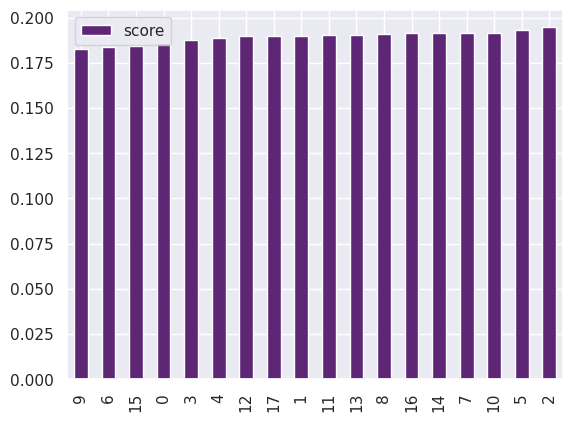

In [75]:
rf_models.sort_values('score').plot(kind='bar', y='score')

The best model is that with index 0, the very first one trained in the GridSearch. The parameters will now be extracted and used to train the best_rf model

In [83]:
best_params = rf_models.sort_values('score').iloc[0]
best_params

n_estimators         150
criterion       log_loss
max_depth             10
score           0.182745
Name: 9, dtype: object

In [11]:
rf = RandomForestClassifier(n_estimators=150, criterion='log_loss', max_depth=10)
best_rf = imb_pipe(
                RandomOverSampler(random_state=42),
                OneHotEncoder(handle_unknown='ignore'),
                rf
            )
best_rf.fit(X_train, y_train)
score = 1 - accuracy_score(best_rf.predict(X_test), y_test)
print(f"Score: {score}")

Score: 0.190395240118997


<a id="1.3"></a>
<h2 style="font-family: sans-serif; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #010989; background-color: #bdbdbd; padding:5px">Hyperparameter Tuning for <b>CatBoost</b> Model</h2>

In [85]:
# cb = CatBoostClassifier()
# cb_parameters = {
#     "catboostclassifier__learning_rate": [0.1, 0.5, 0.75],
#     "catboostclassifier__depth": [6, 15, 100]
# }

# cb_models = run_grid_search(cb, cb_parameters)

In [86]:
# # Run manual GridSearch for CatBoost also, GridSearchCV runs infinitely
# # The GridSearchCv runs non-stop. A manual gridsearch will be attempted
# cb_learning_rate = [0.1, 0.5, 1]
# cb_depth = [6, 15, 50, 100]
# cb_fbt = ["GreedyLogSum", "MinEntropy"] # feature border type
# n = 1

# cb_learning_rate_list = []
# cb_depth_list = []
# cb_fbt_list = []
# cb_score_list = []

# for rate in cb_learning_rate:
#     for depth in cb_depth:
#         for fbt in cb_fbt:
#             print(f"Training Model {n}: || learning_rate: {rate} || depth: {depth} || feature_border_type: {fbt}", end=" || ")
#             cb = CatBoostClassifier(learning_rate=rate, depth=depth, feature_border_type=fbt, verbose=0)
#             # make pipeline with
#             cb_pipe = imb_pipe(
#                 RandomOverSampler(random_state=42),
#                 OneHotEncoder(handle_unknown='ignore'),
#                 cb
#             )
#             cb_pipe.fit(X_train, y_train)
#             score = 1 - accuracy_score(cb_pipe.predict(X_test), y_test)
#             print(f"Score: {score}")
#             n+=1

#             cb_learning_rate_list.append(rate)
#             cb_depth_list.append(depth)
#             cb_fbt_list.append(fbt)
#             cb_score_list.append(score)

# # create DataFrame of parameters and scores
# cb_models = pd.DataFrame(
#     {
#         "learning_rate": cb_learning_rate_list,
#         "depth": cb_depth_list,
#         "feature_border_type": cb_fbt_list,
#         "score": cb_score_list
#     }
# )

<a id="1.3"></a>
<h2 style="font-family: sans-serif; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #010989; background-color: #bdbdbd; padding:5px">Hyperparameter Tuning for <b>GradientBoost</b> Model</h2>

In [87]:
gb = GradientBoostingClassifier()

gb_parameters = {
    "gradientboostingclassifier__learning_rate": [0.1, 0,3, 0.75],
    "gradientboostingclassifier__n_estimators": [100, 150, 300],
    "gradientboostingclassifier__loss": ["log_loss", "exponential"]
}

gb_models = run_grid_search(gb, gb_parameters)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
gb_models.best_score_

0.8052050890664709

In [ ]:
gb_best_params = gb_models.best_params_
gb_best_params

{'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__loss': 'exponential',
 'gradientboostingclassifier__n_estimators': 100}

In [ ]:
best_gb = gb_models.best_estimator_

In [14]:
gb = GradientBoostingClassifier(learning_rate=0.1, loss='exponential', n_estimators=100)
best_gb = imb_pipe(
                RandomOverSampler(random_state=42),
                OneHotEncoder(handle_unknown='ignore'),
                gb
            )

In [15]:
best_gb.fit(X_train, y_train)
1 - accuracy_score(best_gb.predict(X_test), y_test)

0.193795155121122

---

<a id="stacking"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#010989;
           font-size:200%;
           font-family:Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#bdbdbd;
          font-size:120%;
          text-align:center;">
Stacking Model<br>
</p>
</div>

In [18]:
stacking_model = StackingClassifier(
    estimators=[
        ("RidgeClassifier", best_rc),
        ("GradientBoost", best_gb),
        ("RandomForestClassifier", best_rf)
    ]
)

In [19]:
stacking_model.fit(X_train, y_train)
1 - accuracy_score(stacking_model.predict(X_test), y_test)

0.11134721631959199

In [20]:
1 - 0.11134721631959199

0.888652783680408

### Save model

In [ ]:
# with open("models/inclusion_model.pkl", 'wb') as file:
#     pickle.dump(stacking_model, file)
# initially trained model

In [23]:
with open("models/inclusion_model2.pkl", 'wb') as file:
    pickle.dump(stacking_model, file)

<a id="improve"></a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#010989;
           font-size:200%;
           font-family:Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#bdbdbd;
          font-size:120%;
          text-align:center;">
Improve Model<br>
</p>
</div>

<a id="further-exp-eng"></a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#010989;
           font-size:200%;
           font-family:Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#bdbdbd;
          font-size:120%;
          text-align:center;">
Further Exploration and Feature Engineering<br>
</p>
</div>

In [ ]:
df = wrangle("data/Train.csv")
df.head()

,country,year,bank_account,location_type,cellphone_access,household_size,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_group
uniqueid,,,,,,,,,,,,
uniqueid_1,Kenya,2018-01-01,1,Rural,True,3,Female,Spouse,Married/Living together,Secondary education,Self employed,1
uniqueid_2,Kenya,2018-01-01,0,Rural,True,5,Female,Head of Household,Widowed,No formal education,Government Dependent,6
uniqueid_3,Kenya,2018-01-01,1,Urban,True,5,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,2
uniqueid_4,Kenya,2018-01-01,0,Rural,True,5,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,2
uniqueid_5,Kenya,2018-01-01,0,Urban,True,8,Male,Child,Single/Never Married,Primary education,Informally employed,2


In [ ]:
df.reset_index(inplace=True)
df.head()

,uniqueid,country,year,bank_account,location_type,cellphone_access,household_size,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_group
0,uniqueid_1,Kenya,2018-01-01,1,Rural,True,3,Female,Spouse,Married/Living together,Secondary education,Self employed,1
1,uniqueid_2,Kenya,2018-01-01,0,Rural,True,5,Female,Head of Household,Widowed,No formal education,Government Dependent,6
2,uniqueid_3,Kenya,2018-01-01,1,Urban,True,5,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,2
3,uniqueid_4,Kenya,2018-01-01,0,Rural,True,5,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,2
4,uniqueid_5,Kenya,2018-01-01,0,Urban,True,8,Male,Child,Single/Never Married,Primary education,Informally employed,2


### Household Size

In [ ]:
df.household_size.value_counts()

2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: household_size, dtype: int64

<AxesSubplot:xlabel='household_size', ylabel='Count'>

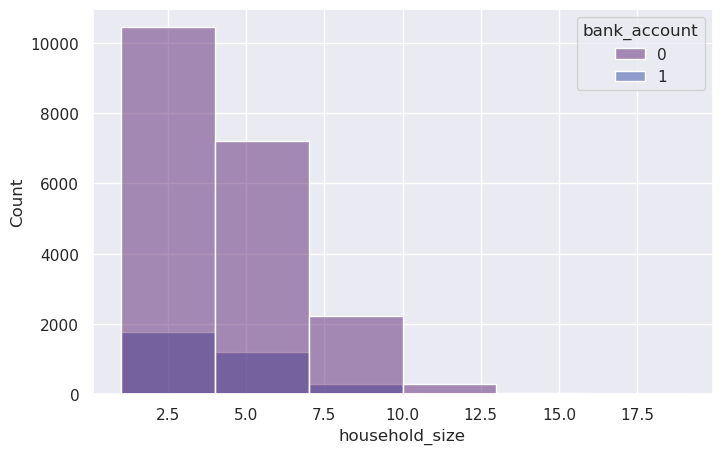

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='household_size', hue='bank_account', bins=np.arange(1, 20, 3))

<AxesSubplot:xlabel='household_size'>

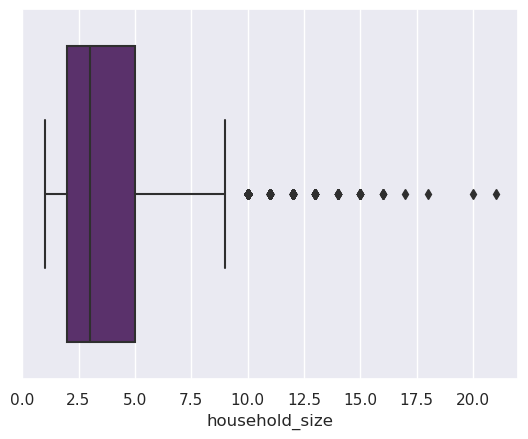

In [ ]:
sns.boxplot(data=df, x='household_size')

In [ ]:
len(df.household_size[df.household_size>8])

744

In [ ]:
min(df.household_size), max(df.household_size)

(1, 21)

<div style="font-family:Georgia; color:#010989; background-color:#bdbdbd; padding:30px; font-size:17px;">
<b style="font-size: 20px">Insights</b>

> BThe household sizes are concentrated between 1 and about 9. Above that, there are only a few points. Thus, Bin the Household size:<br>
    - 1: >5<br>
    - 2: 5 - 9<br>
    - 3: 10 and above<br>

</div>

### Relationship with Head

<AxesSubplot:xlabel='relationship_with_head', ylabel='count'>

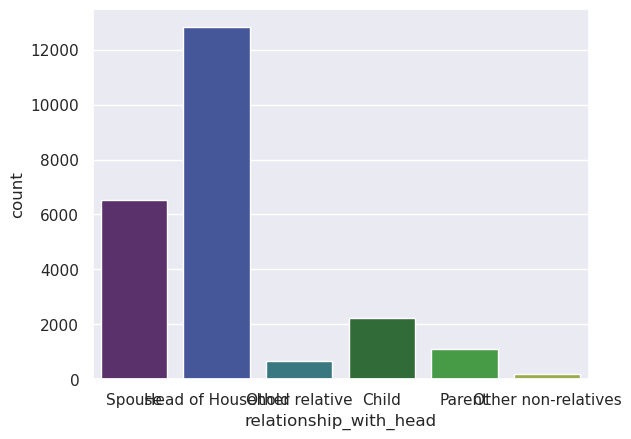

In [ ]:
sns.countplot(data=df, x='relationship_with_head')

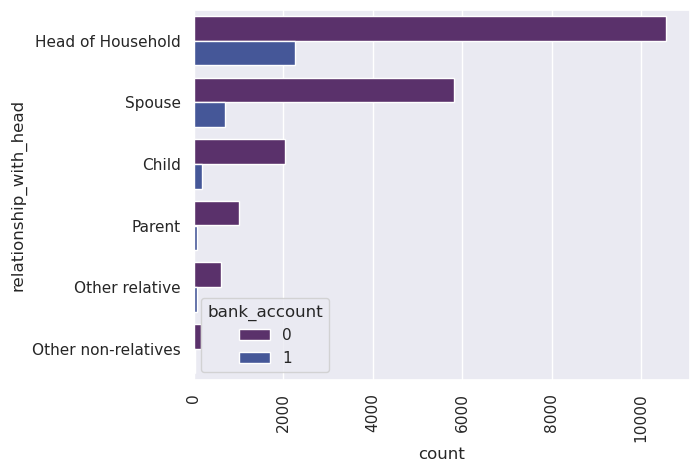

In [ ]:
sns.countplot(data=df, y='relationship_with_head', hue='bank_account', orient='h',
                order=df.relationship_with_head.value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=90);

In [ ]:
df.relationship_with_head.value_counts().sort_values(ascending=False).index

Index(['Head of Household', 'Spouse', 'Child', 'Parent', 'Other relative',
       'Other non-relatives'],
      dtype='object')

In [ ]:
df.relationship_with_head.value_counts().sort_values(ascending=False)

Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64

In [ ]:
print("Proportion of 'Other non-relatives' with bank accounts")
len(df.relationship_with_head[(df.relationship_with_head=='Other non-relatives') & (df.bank_account==True)]) / \
    len(df.relationship_with_head[df.relationship_with_head=='Other non-relatives']) * 100

Proportion of Other non-relatives with bank accounts


10.526315789473683

In [ ]:
print("Proportion of 'Other relative' with bank accounts")
len(df.relationship_with_head[(df.relationship_with_head=='Other relative') & (df.bank_account==True)]) / \
    len(df.relationship_with_head[df.relationship_with_head=='Other relative']) * 100

Proportion of 'Other relative' with bank accounts


9.880239520958083

In [ ]:
print("Proportion of 'Parent' with bank accounts")
len(df.relationship_with_head[(df.relationship_with_head=='Parent') & (df.bank_account==True)]) / \
    len(df.relationship_with_head[df.relationship_with_head=='Parent']) * 100

Proportion of 'Parent' with bank accounts


5.985267034990792

In [ ]:
print("Proportion of 'Child' with bank accounts")
len(df.relationship_with_head[(df.relationship_with_head=='Child') & (df.bank_account==True)]) / \
    len(df.relationship_with_head[df.relationship_with_head=='Child']) * 100

Proportion of 'Child' with bank accounts


8.658591296545536

In [ ]:
print("Proportion of 'Spouse' with bank accounts")
len(df.relationship_with_head[(df.relationship_with_head=='Spouse') & (df.bank_account==True)]) / \
    len(df.relationship_with_head[df.relationship_with_head=='Spouse']) * 100

Proportion of 'Spouse' with bank accounts


10.659509202453988

In [ ]:
print("Proportion of 'Head of Household' with bank accounts")
len(df.relationship_with_head[(df.relationship_with_head=='Head of Household') & (df.bank_account==True)]) / \
    len(df.relationship_with_head[df.relationship_with_head=='Head of Household']) * 100

Proportion of 'Head of Household' with bank accounts


17.714909204270906

In [ ]:
df.relationship_with_head[df.bank_account==True].value_counts(normalize=True) * 100

Head of Household      68.629227
Spouse                 20.984300
Child                   5.827295
Other relative          1.992754
Parent                  1.962560
Other non-relatives     0.603865
Name: relationship_with_head, dtype: float64

<div style="font-family:Georgia; color:#010989; background-color:#bdbdbd; padding:30px; font-size:17px;">
<b style="font-size: 20px">Insights</b>

> The proportion of Other relative and Other non-relatives without bank accounts are similar. So, they'll be merged into 1 'Other' column

</div>

#### Define function to explore proportions as above

In [ ]:
def count_props(df, column):
    items = df[column].value_counts().index

    props = {}

    for item in items:
        prop = len(df[column][(df[column]==item) & (df.bank_account==True)]) / \
            len(df[column][df[column]==item]) * 100
        props[item] = round(prop, 2)

    return props

count_props(df, 'relationship_with_head')

{'Head of Household': 17.71,
 'Spouse': 10.66,
 'Child': 8.66,
 'Parent': 5.99,
 'Other relative': 9.88,
 'Other non-relatives': 10.53}

### Marital Status

In [ ]:
df.marital_status.value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

In [ ]:
marital_props = count_props(df, 'marital_status')
marital_props

{'Married/Living together': 17.36,
 'Single/Never Married': 12.1,
 'Widowed': 9.01,
 'Divorced/Seperated': 11.27,
 'Dont know': 25.0}

<BarContainer object of 5 artists>

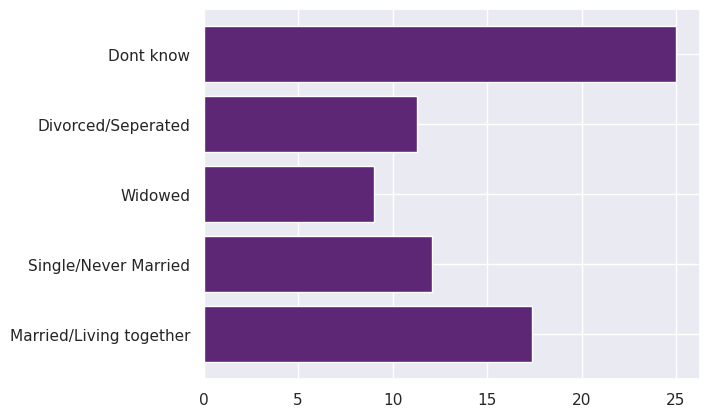

In [ ]:
plt.barh(range(len(marital_props)), marital_props.values(), tick_label=list(marital_props.keys()))

### Education Level

In [ ]:
df.education_level.value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

In [ ]:
count_props(df, 'education_level')

{'Primary education': 8.55,
 'No formal education': 3.9,
 'Secondary education': 23.28,
 'Tertiary education': 51.08,
 'Vocational/Specialised training': 57.04,
 'Other/Dont know/RTA': 31.43}

### Job Type

In [ ]:
df.job_type.value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

In [ ]:
job_props = count_props(df, 'job_type')
job_props

{'Self employed': 13.17,
 'Informally employed': 7.95,
 'Farming and Fishing': 11.67,
 'Remittance Dependent': 9.5,
 'Other Income': 18.15,
 'Formally employed Private': 54.12,
 'No Income': 2.07,
 'Formally employed Government': 77.52,
 'Government Dependent': 20.24,
 'Dont Know/Refuse to answer': 11.11}

<div style="font-family:Georgia; color:#010989; background-color:#bdbdbd; padding:30px; font-size:17px;">
<b style="font-size: 20px">Insights</b>

> While exploring proportions of categories in each column with bank account showed interesting insights, it also revealed there is not a lot of justification for merging two categories into an 'Other' category

</div>

### More Multivariate Explorations

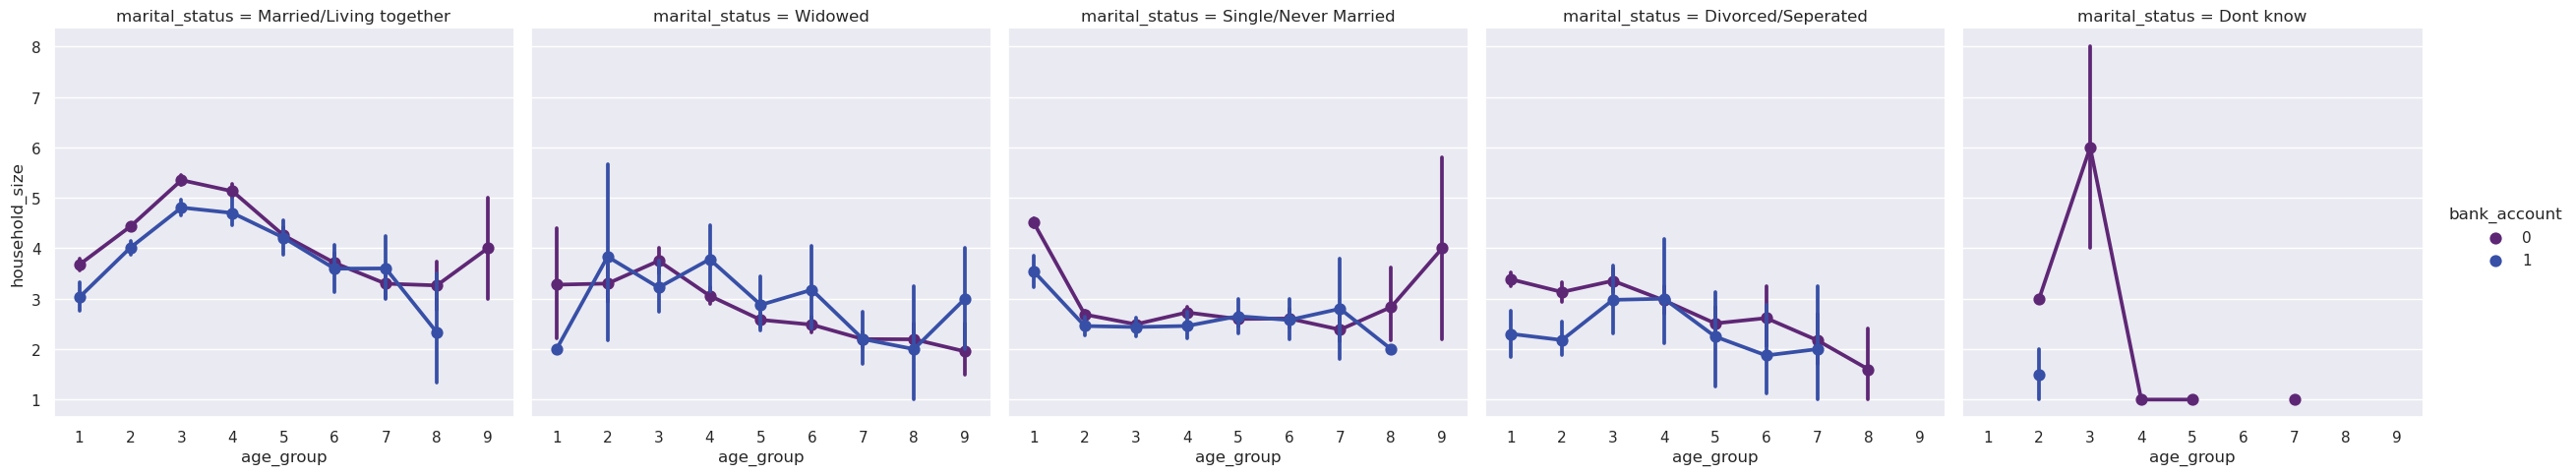

In [ ]:
g = sns.catplot(data=df, x='age_group', y='household_size', col='marital_status', hue='bank_account', \
                kind='point')

### Keep track of further wrangling

In [24]:
# helper function
def group_household_size(x):
    if x<5:
        return 1
    elif x<10:
        return 2
    else:
        return 3


def further_wrangle(filepath, test=False):
    """Additional wrangling and feature engineering
    
    Args:
        filepath (str): path to the file
        
    Returns:
        returns dataframe with further wrangling
    """

    # apply initial wrangling
    df = wrangle(filepath, test)

    df.reset_index(inplace=True)

    # group household_sizes
    df['house_size_groups'] = list(map(group_household_size, df.household_size))

    # create 'Other' category in relationship_with_head column
    df.relationship_with_head = df.relationship_with_head.replace({'Other relative':'Other', 'Other non-relatives':'Other'})

    # set_index to uniqueid
    df.set_index('uniqueid', inplace=True)

    # drop columns
    df.drop(columns=['household_size'], inplace=True)

    return df

further_wrangle('data/Train.csv').head()

,country,year,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_group,house_size_groups
uniqueid,,,,,,,,,,,,
uniqueid_1,Kenya,2018-01-01,1,Rural,True,Female,Spouse,Married/Living together,Secondary education,Self employed,1,1
uniqueid_2,Kenya,2018-01-01,0,Rural,True,Female,Head of Household,Widowed,No formal education,Government Dependent,6,2
uniqueid_3,Kenya,2018-01-01,1,Urban,True,Male,Other,Single/Never Married,Vocational/Specialised training,Self employed,2,2
uniqueid_4,Kenya,2018-01-01,0,Rural,True,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,2,2
uniqueid_5,Kenya,2018-01-01,0,Urban,True,Male,Child,Single/Never Married,Primary education,Informally employed,2,2


#### Group the household size column

In [ ]:
def group_household_size(x):
    if x<5:
        return 1
    elif x<10:
        return 2
    else:
        return 3

df['house_size_groups'] = list(map(group_household_size, df.household_size))
df.head()


,uniqueid,country,year,bank_account,location_type,cellphone_access,household_size,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_group,house_size_groups
0,uniqueid_1,Kenya,2018-01-01,1,Rural,True,3,Female,Spouse,Married/Living together,Secondary education,Self employed,1,1
1,uniqueid_2,Kenya,2018-01-01,0,Rural,True,5,Female,Head of Household,Widowed,No formal education,Government Dependent,6,2
2,uniqueid_3,Kenya,2018-01-01,1,Urban,True,5,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,2,2
3,uniqueid_4,Kenya,2018-01-01,0,Rural,True,5,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,2,2
4,uniqueid_5,Kenya,2018-01-01,0,Urban,True,8,Male,Child,Single/Never Married,Primary education,Informally employed,2,2


#### Merge 'Other relative' and 'Other non-relatives' in relationship_with_head

In [ ]:
df.relationship_with_head = df.relationship_with_head.replace({'Other relative':'Other', 'Other non-relatives':'Other'})
df.head()

,uniqueid,country,year,bank_account,location_type,cellphone_access,household_size,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_group,house_size_groups
0,uniqueid_1,Kenya,2018-01-01,1,Rural,True,3,Female,Spouse,Married/Living together,Secondary education,Self employed,1,1
1,uniqueid_2,Kenya,2018-01-01,0,Rural,True,5,Female,Head of Household,Widowed,No formal education,Government Dependent,6,2
2,uniqueid_3,Kenya,2018-01-01,1,Urban,True,5,Male,Other,Single/Never Married,Vocational/Specialised training,Self employed,2,2
3,uniqueid_4,Kenya,2018-01-01,0,Rural,True,5,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,2,2
4,uniqueid_5,Kenya,2018-01-01,0,Urban,True,8,Male,Child,Single/Never Married,Primary education,Informally employed,2,2


#### Drop columns

In [ ]:
df.drop(columns=['household_size'], inplace=True)

---

<a id="retrain"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#010989;
           font-size:200%;
           font-family:Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#bdbdbd;
          font-size:120%;
          text-align:center;">
Load New Data and Retrain Model<br>
</p>
</div>

In [25]:
test_df = further_wrangle('data/Train.csv')
test_df.head()

,country,year,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_group,house_size_groups
uniqueid,,,,,,,,,,,,
uniqueid_1,Kenya,2018-01-01,1,Rural,True,Female,Spouse,Married/Living together,Secondary education,Self employed,1,1
uniqueid_2,Kenya,2018-01-01,0,Rural,True,Female,Head of Household,Widowed,No formal education,Government Dependent,6,2
uniqueid_3,Kenya,2018-01-01,1,Urban,True,Male,Other,Single/Never Married,Vocational/Specialised training,Self employed,2,2
uniqueid_4,Kenya,2018-01-01,0,Rural,True,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,2,2
uniqueid_5,Kenya,2018-01-01,0,Urban,True,Male,Child,Single/Never Married,Primary education,Informally employed,2,2


In [26]:
y = test_df.bank_account
X = test_df.drop(columns=['bank_account'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=42)
X_train.shape, y_train.shape

((19995, 11), (19995,))

In [67]:
# load the first model
with open("models/inclusion_model.pkl", 'rb') as file:
    model = pickle.load(file)
model

StackingClassifier(estimators=[('RidgeClassifier',
                                Pipeline(steps=[('randomoversampler',
                                                 RandomOverSampler(random_state=42)),
                                                ('onehotencoder',
                                                 OneHotEncoder(handle_unknown='ignore')),
                                                ('ridgeclassifier',
                                                 RidgeClassifier(alpha=0.1,
                                                                 solver='sparse_cg',
                                                                 tol=0.0001))])),
                               ('GradientBoostingClassifier',
                                Pipeline(steps=[('randomoversampler',
                                                 RandomOverSampler(random_state=42)),
                                                ('onehotencoder',
                                                 OneHotEncoder(handle_unknown='ignore')),
                                                ('gradientboostingclassifier',
                                                 GradientBoostingClassifier(loss='exponential'))]))])

In [50]:
# retrain the model with the newly transformed dataset
model.fit(X_train, y_train)
1 - accuracy_score(model.predict(X_test), y_test)

0.11419665627656561

In [34]:
with open("models/inclusion_model2.pkl", 'rb') as file:
    model2 = pickle.load(file)

In [51]:
model2

StackingClassifier(estimators=[('RidgeClassifier',
                                Pipeline(steps=[('randomoversampler',
                                                 RandomOverSampler(random_state=42)),
                                                ('onehotencoder',
                                                 OneHotEncoder(handle_unknown='ignore')),
                                                ('ridgeclassifier',
                                                 RidgeClassifier(alpha=0.1,
                                                                 solver='sparse_cg',
                                                                 tol=0.1))])),
                               ('GradientBoost',
                                Pipeline(steps=[('randomoversampler',
                                                 RandomOverSampler(random_state=42)),
                                                ('o...
                                                 OneHotEncoder(handle_unknown='ignore')),
                                                ('gradientboostingclassifier',
                                                 GradientBoostingClassifier(loss='exponential'))])),
                               ('RandomForestClassifier',
                                Pipeline(steps=[('randomoversampler',
                                                 RandomOverSampler(random_state=42)),
                                                ('onehotencoder',
                                                 OneHotEncoder(handle_unknown='ignore')),
                                                ('randomforestclassifier',
                                                 RandomForestClassifier(criterion='log_loss',
                                                                        max_depth=10,
                                                                        n_estimators=150))]))])

In [35]:
model2.fit(X_train, y_train),
1 - accuracy_score(model2.predict(X_test), y_test)

0.11306319070558235

<a id="predict-submit"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#010989;
           font-size:200%;
           font-family:Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#bdbdbd;
          font-size:120%;
          text-align:center;">
Predict on Testing Data<br>
</p>
</div>

### Load Model

Predictions made with with the originally trained model before improvements

In [55]:
test_df = wrangle("data/Test.csv", test=True)
test_df.head()

,country,year,location_type,cellphone_access,household_size,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_group
uniqueid,,,,,,,,,,,
uniqueid_6056,Kenya,2018-01-01,Urban,True,3,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,2
uniqueid_6060,Kenya,2018-01-01,Urban,True,7,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,4
uniqueid_6065,Kenya,2018-01-01,Rural,True,3,Female,Parent,Married/Living together,No formal education,Remittance Dependent,7
uniqueid_6072,Kenya,2018-01-01,Rural,True,6,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,3
uniqueid_6073,Kenya,2018-01-01,Urban,True,3,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,1


In [56]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10086 entries, uniqueid_6056 to uniqueid_3002
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   country                 10086 non-null  object        
 1   year                    10086 non-null  datetime64[ns]
 2   location_type           10086 non-null  object        
 3   cellphone_access        10086 non-null  bool          
 4   household_size          10086 non-null  int64         
 5   gender_of_respondent    10086 non-null  object        
 6   relationship_with_head  10086 non-null  object        
 7   marital_status          10086 non-null  object        
 8   education_level         10086 non-null  object        
 9   job_type                10086 non-null  object        
 10  age_group               10086 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(7)
memory usage: 876.6+ KB


In [68]:
test_pred = model.predict(test_df)

In [69]:
test_pred

array([1, 1, 0, ..., 0, 0, 0])

### Prepare Submission

In [ ]:
# create submission dataframe
submission_df = test_df['country'].reset_index()
submission_df.head()

,uniqueid,country
0,uniqueid_6056,Kenya
1,uniqueid_6060,Kenya
2,uniqueid_6065,Kenya
3,uniqueid_6072,Kenya
4,uniqueid_6073,Kenya


In [ ]:
# add predictions
submission_df['bank_account'] = test_pred
submission_df.head()

,uniqueid,country,bank_account
0,uniqueid_6056,Kenya,1
1,uniqueid_6060,Kenya,1
2,uniqueid_6065,Kenya,0
3,uniqueid_6072,Kenya,0
4,uniqueid_6073,Kenya,0


In [ ]:
# combine uniqueid and country columns
submission_df.uniqueid = submission_df.uniqueid + ' ' + 'x' + ' ' + submission_df.country
submission_df.head()

,uniqueid,country,bank_account
0,uniqueid_6056 x Kenya,Kenya,1
1,uniqueid_6060 x Kenya,Kenya,1
2,uniqueid_6065 x Kenya,Kenya,0
3,uniqueid_6072 x Kenya,Kenya,0
4,uniqueid_6073 x Kenya,Kenya,0


In [ ]:
# set uniqueid as index
submission_df.set_index(submission_df.uniqueid, inplace=True)
submission_df.head()

,uniqueid,country,bank_account
uniqueid,,,
uniqueid_6056 x Kenya,uniqueid_6056 x Kenya,Kenya,1
uniqueid_6060 x Kenya,uniqueid_6060 x Kenya,Kenya,1
uniqueid_6065 x Kenya,uniqueid_6065 x Kenya,Kenya,0
uniqueid_6072 x Kenya,uniqueid_6072 x Kenya,Kenya,0
uniqueid_6073 x Kenya,uniqueid_6073 x Kenya,Kenya,0


In [ ]:
# drop excessive columns
submission_df.drop(columns=['uniqueid', 'country'], inplace=True)
submission_df.head()

,bank_account
uniqueid,
uniqueid_6056 x Kenya,1
uniqueid_6060 x Kenya,1
uniqueid_6065 x Kenya,0
uniqueid_6072 x Kenya,0
uniqueid_6073 x Kenya,0


In [65]:
def generate_submission(predictions):
    """ Function to generate submission
    
    Args:
        predictions (list): list of predictions
        
    Returns:
        submission_df (pd.DataFrame): a dataframe containing the submissions"""
    
    # create submission dataframe
    submission_df = test_df['country'].reset_index()

    # add predictions
    submission_df['bank_account'] = predictions

    # combine uniqueid and country columns
    submission_df.uniqueid = submission_df.uniqueid + ' ' + 'x' + ' ' + submission_df.country

    # set uniqueid as index
    submission_df.set_index(submission_df.uniqueid, inplace=True)

    # drop excessive columns
    submission_df.drop(columns=['uniqueid', 'country'], inplace=True)

    return submission_df

### Save submissions

In [ ]:
submission_df.to_csv('submission_fin_inc.csv')

# Predict with new model

Predictions made with the newly trained model

In [59]:
test_df = further_wrangle('data/Test.csv', test=True)
new_pred = model2.predict(test_df)
new_pred

array([1, 1, 0, ..., 0, 0, 0])

In [60]:
len(new_pred)

10086

In [66]:
generate_submission(new_pred).to_csv('data/submission_fin_inc.csv')

### Save
While the inital model appears to perform better on the testing data, the final model (the retrained model2, actually scored better on the official test set.<br>
This will be saved as `final-model.pkl`<br>
The final processed dataset will also be saved<br>

In [62]:
# save model
with open('models/final_model.pkl', 'wb') as file:
    pickle.dump(model2, file)

In [63]:
# save data
test_df.to_csv('data/processed_data.csv', index=False)

> (c) EBENEZER MARADESA 2023